In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pickle
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pickle
import os
import joblib
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
tf.random.set_seed(42)

In [2]:
def load_and_preprocess(filepath):
    df = pd.read_csv(filepath, index_col=[0])
    # df=df[['SrcWin','sHops','dHops','sTtl','dTtl','SynAck','SrcBytes','DstBytes','SAppBytes',\
    #                    'Dur','TotPkts','TotBytes','TotAppByte','Rate','SrcRate','Label']]
    #Le = LabelEncoder()
    #df['Label'] = le.fit_transform(df['Label'])
    df=df[['SrcWin', 'sHops', 'sTtl', 'dTtl', 'SrcBytes', 'DstBytes', 'Dur', 'TotBytes', 'Rate','Label']]
    print(df.shape)
    print("loading data")
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    return X, y,df


In [3]:

# data_path='./data/'
# train_file = os.path.join(data_path, 'ISCX_training.csv')
# test_file = os.path.join(data_path, 'ISCX_Testing.csv')
# X_train, y_train,train_df = load_and_preprocess(train_file)
# X_test, y_test,test_df = load_and_preprocess(test_file)
# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

data_path='./data/'
single_file = os.path.join(data_path, 'isot_botnet.csv')
X, y,df = load_and_preprocess(single_file)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

train_indices, test_indices, y_train, y_test = train_test_split(np.arange(len(X)), y, test_size=0.3, random_state=42,shuffle=True)
train_df = X.iloc[train_indices]
test_df = X.iloc[test_indices]


c:\Users\Yumlum\.conda\envs\geometric\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(1473503, 10)
loading data


In [4]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[['SrcWin', 'sHops', 'sTtl', 'dTtl', 'SrcBytes', 'DstBytes', 'Dur', 'TotBytes', 'Rate']])
X_test_scaled = scaler.transform(test_df[['SrcWin', 'sHops', 'sTtl', 'dTtl', 'SrcBytes', 'DstBytes', 'Dur', 'TotBytes', 'Rate']])

In [5]:
model_path='./optimization/information_feature_selection/'

In [6]:
rf_clf=joblib.load(model_path+'best_rf_exploration_400_indisot_botnet.pkl')
predictions = rf_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
# Print out its metrics
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 score: ", f1_score(y_test, predictions))
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions))

Accuracy:  0.9927723271749187
Precision:  0.9816922160569297
Recall:  0.9230383776454637
F1 score:  0.9514622104063806
Confusion Matrix: 
 [[407541    584]
 [  2611  31315]]


In [7]:
neural_net=load_model(model_path+'optimized_nn_full_training_500isot_botnet.h5')


In [8]:
predictions = neural_net.predict(X_test_scaled)

In [9]:
# predictions = neural_net.predict(X_test)
predictions = [round(x[0]) for x in predictions] 
# Print out its metrics
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 score: ", f1_score(y_test, predictions))
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions))

Accuracy:  0.9874946555940378
Precision:  0.9726383063710805
Recall:  0.8612863290691505
F1 score:  0.9135817908954478
Confusion Matrix: 
 [[407303    822]
 [  4706  29220]]


In [22]:
malware_pred_index=np.where((np.array(predictions)==1) & (np.array(y_test)==1))[0]
X_test_malware=X_test_scaled[malware_pred_index]

In [50]:
cw_iscx_path=r'output_gan_isot/'

In [51]:
save_path=cw_iscx_path
current_path=cw_iscx_path
name='isot_gan'

In [13]:
def read_data(path):
    with open(path, 'rb') as file:
        data = pickle.load(file)
    return data

In [14]:
features_to_attack =  ['SrcWin', 'sHops', 'sTtl', 'dTtl', 'SrcBytes', 'DstBytes', 'Dur', 'TotBytes', 'Rate']

In [15]:
keys=[5,100,750,1000,2000]
checkpoints=keys

In [52]:
current_path

'output_gan_isot/'

In [20]:
gan_data=read_data(current_path+'SrcWin'+'_data.pkl')

In [21]:
print(gan_data['misclassification_rates'])

[9.45, 9.45, 9.45, 9.45, 9.45]


In [19]:
print(gan_data['dt_miss_rate_list'])

[56.28, 56.28, 56.28, 56.28, 56.28]


In [25]:
from matplotlib.ticker import FuncFormatter

# Function to format the tick labels as integers
def integer_formatter(x, pos):
    return f"{int(x)}"


In [26]:
def scientific_formatter(x, pos):
    if abs(x) >= 1000:  # Use scientific notation for large numbers
        return f'{x:.1e}'
    elif abs(x) < 1:  # For very small numbers, use the default formatting
        return f'{x}'
    else:  # For moderate numbers, limit the number of decimal places
        return f'{x:.2f}'

current Feature  SrcWin


IndexError: index 29220 is out of bounds for axis 0 with size 29220

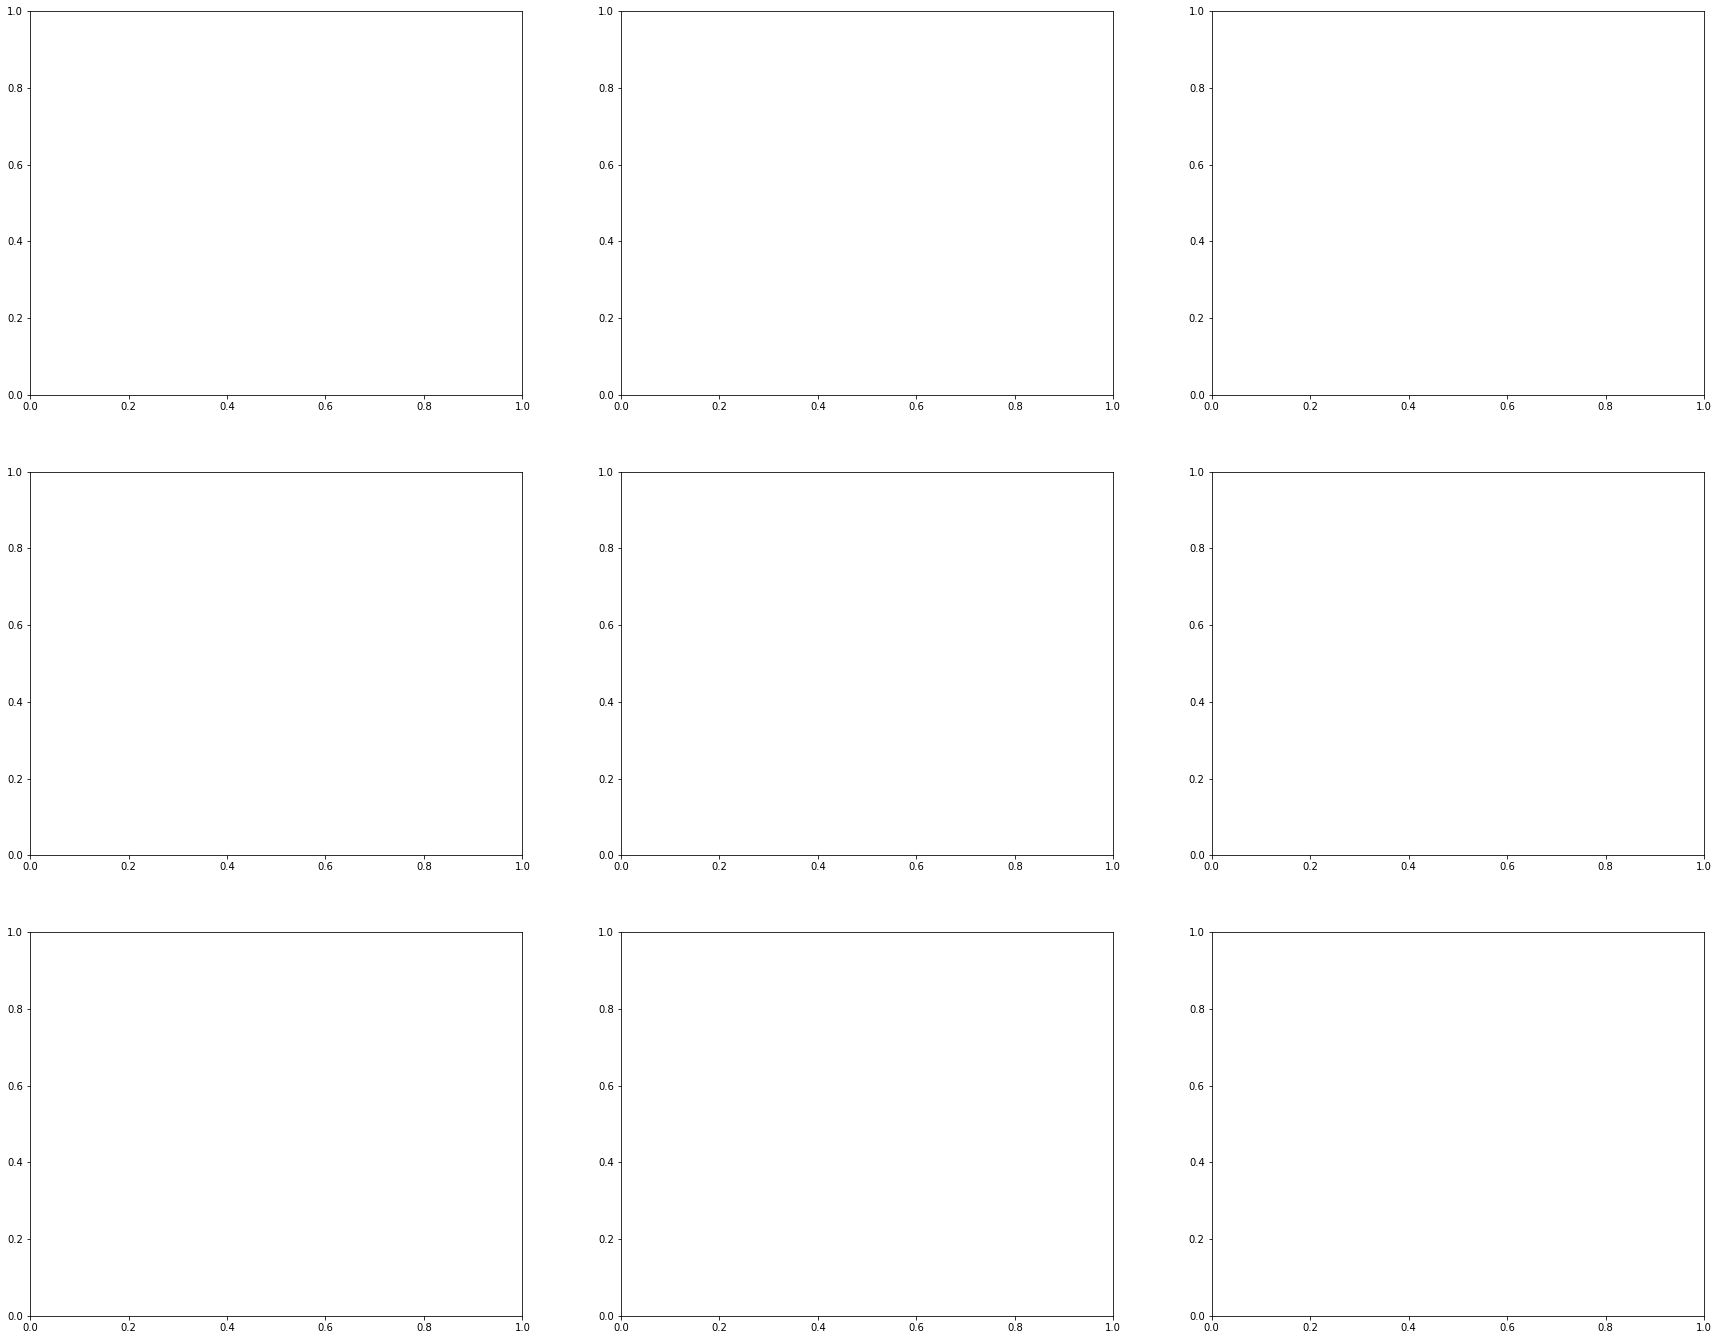

In [27]:
## FOR ISCX forgot to save L2 so need recalculation

# Adjusting the plot to have three columns instead of two
num_columns = 3
num_features = len(features_to_attack)
num_rows = num_features // num_columns + (num_features % num_columns > 0)

# Define the fontsize for the legend text and titles
legend_fontsize = 15
title_fontsize = 25
label_fontsize = 25
tick_label_fontsize=20
font_properties = {'size': legend_fontsize, 'weight': 'bold'}
# Set up the figure with adjusted size for three columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(30, num_rows * 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()



features_to_attack = ['SrcWin', 'sHops', 'sTtl', 'dTtl', 'SrcBytes', 'DstBytes', 'Dur', 'TotBytes', 'Rate']
full_adv_sample_list=[]
for index,i in enumerate(features_to_attack):
    ax1 = axes[index]
    print('current Feature ',i)
    iscx_data=read_data(current_path+i+'_data.pkl')
    nn_miss_rate_list = iscx_data['nn_miss_rate_list']
    rf_miss_rate_list = iscx_data['dt_miss_rate_list']
    l2_distances=[]
    iteration_values = [5,100,750,1000,2000] 
    adversarial_samples_list=iscx_data['adversarial_samples_list']
    unsuccessful_samples_indices_list=iscx_data['unsuccessful_samples_indices_list']
    for idx in range(len(iteration_values)):
            unsuccessful_samples_indices = unsuccessful_samples_indices_list[idx]
            malware_scale = np.delete(X_test_malware, unsuccessful_samples_indices, axis=0)
            adversarial_samples_scale = adversarial_samples_list[idx]
            # Check if the adversarial_samples_scale is empty
            if len(adversarial_samples_scale) == 0:
                print(f"Skipping iteration {idx} due to empty adversarial samples.")
                l2_distances.append(float('nan'))  # append NaN or some placeholder value for the missing data point
                continue
            adversarial_samples_scale_arr = np.array(adversarial_samples_scale)
            malware_scale=malware_scale.astype(np.float32)
            adversarial_samples_ori_space = scaler.inverse_transform(adversarial_samples_scale_arr)
            malware_samples_ori = scaler.inverse_transform(malware_scale)
            
            # Compute L2 distance for SrcBytes
            # l2_distance = np.sqrt(np.sum((malware_samples_ori[:,7] - adversarial_samples_ori_space[:,7])**2))
            # l2_distances.append(l2_distance)

            l2_dist = np.linalg.norm(malware_samples_ori - adversarial_samples_ori_space, axis=1).mean()
            l2_distances.append(l2_dist)
        # NN and RF Miss Rate on the primary y-axis
    ax1.plot(checkpoints, nn_miss_rate_list, '-s', color='blue', label='NN Miss Rate')
    ax1.plot(checkpoints, rf_miss_rate_list, '-^', color='green', label='DT Miss Rate')
    ax1.set_xlabel('Iterations', fontsize=label_fontsize, fontweight='bold')
    ax1.set_ylabel('Missclassification Rate', color='black', fontsize=label_fontsize, fontweight='bold')
    ax1.tick_params(axis='both', labelsize=tick_label_fontsize)
    ax1.set_yticklabels(ax1.get_yticks(), weight='bold')
    ax1.set_xticklabels(ax1.get_xticks(), rotation=0, weight='bold')
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    # Apply this formatter to the x-axis of your plot
    ax1.xaxis.set_major_formatter(FuncFormatter(integer_formatter))
    ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    # L2 Distance on the secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(checkpoints, l2_distances, '-o', color='red', label='L2 Distance')
    ax2.set_ylabel('L2 Distance', color='red', fontsize=label_fontsize, fontweight='bold')
    ax2.tick_params(axis='y', labelsize=tick_label_fontsize)
    ax2.set_yticklabels(ax2.get_yticks(),color='red', weight='bold')
    # Set the legend with larger font size
    ax1.legend(loc='center left', prop=font_properties)
    ax2.legend(loc='center right', prop=font_properties)
    # ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    # Apply the formatter to the L2 distance axis
    ax2.yaxis.set_major_formatter(FuncFormatter(scientific_formatter))

    # Set the title with larger font size
    ax1.set_title(f'{i}', fontsize=title_fontsize, fontweight='bold')
    


# Hide any unused subplots
for ax in axes[num_features:]:
    ax.set_visible(False)

# Adjust the layout
fig.tight_layout()
plt.savefig(save_path+name+'.png', dpi=100)
plt.show()

    

In [28]:
current_path

'output_isot/'

current Feature  SrcWin
[1845.3048, 712.56067, 8.025285, 8.865083, 10.529166]
current Feature  sHops


c:\Users\Yumlum\.conda\envs\geometric\lib\site-packages\ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\Yumlum\.conda\envs\geometric\lib\site-packages\ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\Yumlum\.conda\envs\geometric\lib\site-packages\ipykernel_launcher.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator


[127.02309, 127.12415, 127.13507, 127.13496, 127.134964]
current Feature  sTtl
[127.420006, 127.513405, 127.54324, 127.54324, 127.54326]
current Feature  dTtl
[127.57585, 127.54684, 127.54322, 127.54322, 127.54322]
current Feature  SrcBytes
[43625128000000.0, 3880762500000.0, 1356393100000.0, 2558302000000.0, 3783527500000.0]
current Feature  DstBytes
[1432297100000.0, 1013206550000.0, 869894600000.0, 819333040000.0, 575288500000.0]
current Feature  Dur
[1073.3088, 145.47656, 167.70769, 166.72939, 170.53279]
current Feature  TotBytes
[1710849400000.0, 1163498100000.0, 933389140000.0, 1004196000000.0, 1322683000000.0]
current Feature  Rate
[141982140.0, 82739830.0, 82679630.0, 110068380.0, 130695710.0]


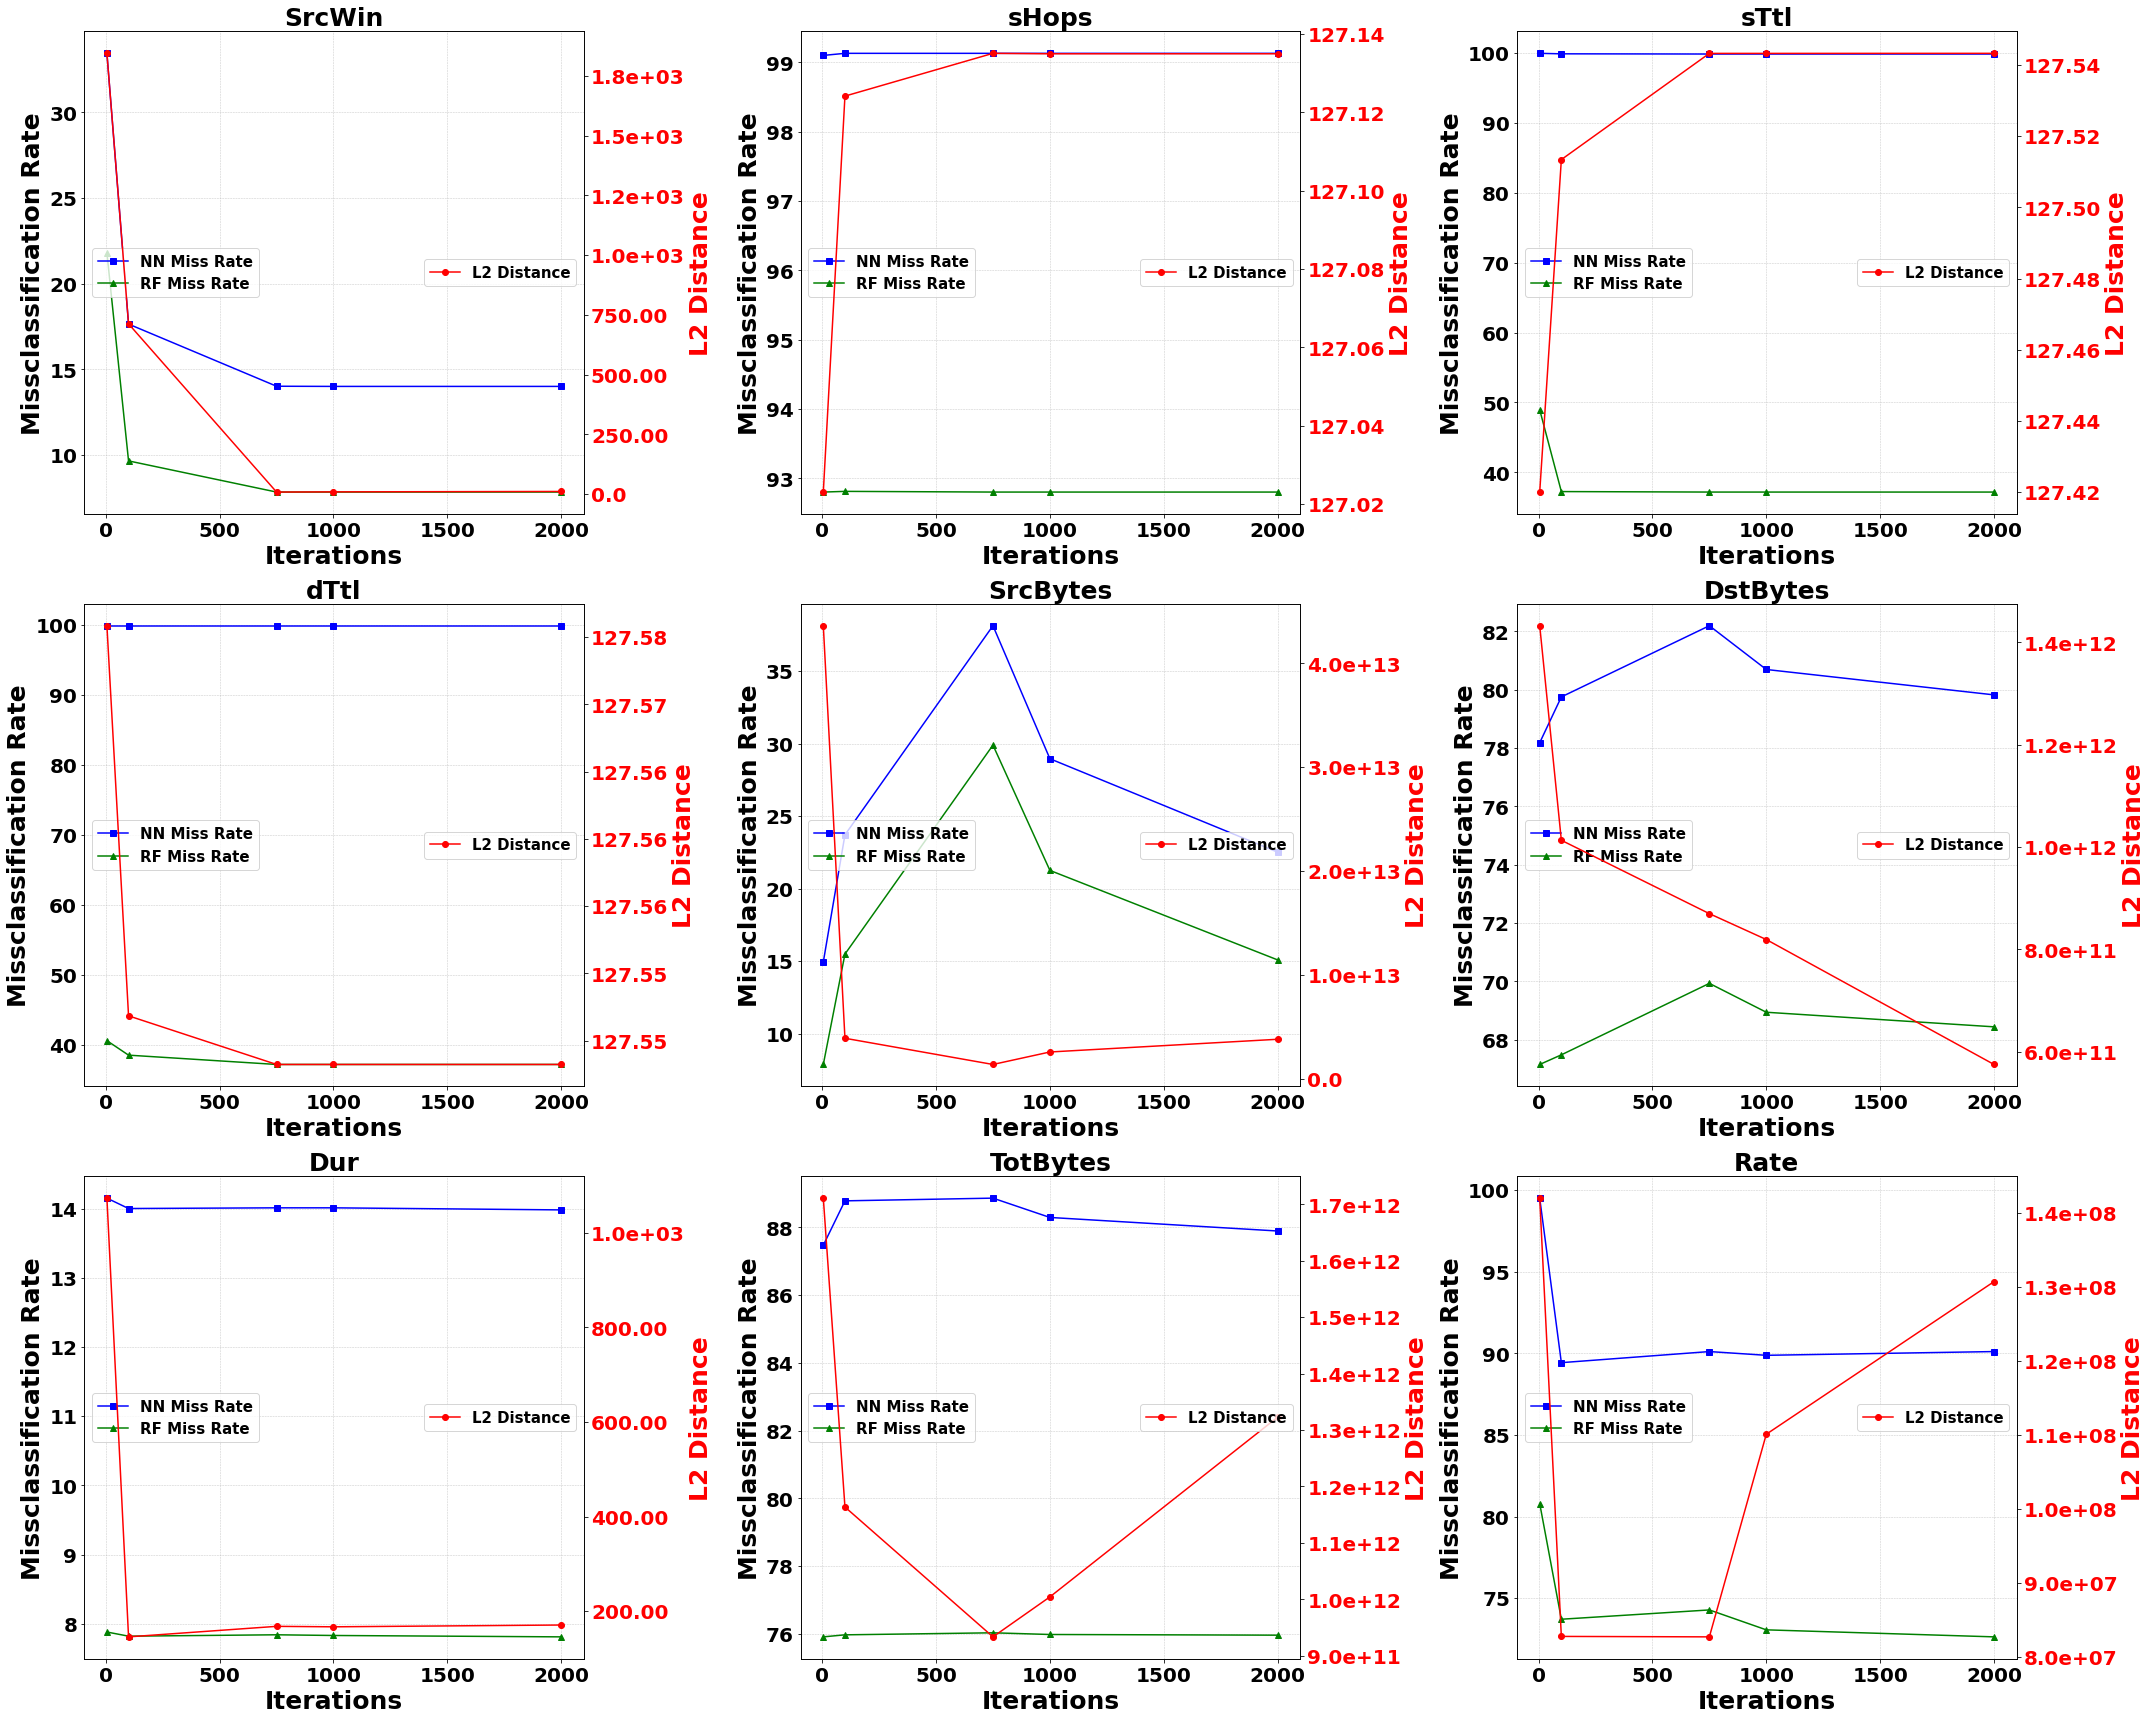

In [37]:
## FOR ISCX forgot to save L2 so need recalculation

# Adjusting the plot to have three columns instead of two
num_columns = 3
num_features = len(features_to_attack)
num_rows = num_features // num_columns + (num_features % num_columns > 0)

# Define the fontsize for the legend text and titles
legend_fontsize = 15
title_fontsize = 25
label_fontsize = 25
tick_label_fontsize=20
font_properties = {'size': legend_fontsize, 'weight': 'bold'}
# Set up the figure with adjusted size for three columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(30, num_rows * 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()



features_to_attack = ['SrcWin', 'sHops', 'sTtl', 'dTtl', 'SrcBytes', 'DstBytes', 'Dur', 'TotBytes', 'Rate']
full_adv_sample_list=[]
for index,i in enumerate(features_to_attack):
    ax1 = axes[index]
    print('current Feature ',i)
    isot_data=read_data(current_path+i+'_data.pkl')
    nn_miss_rate_list = isot_data['misclassification_rates']
    rf_miss_rate_list = isot_data['dt_miss_rate_list']
    l2_distances=isot_data['l2_dit']
    print(l2_distances)
    
    iteration_values = [5,100,750,1000,2000] 
   
        # NN and RF Miss Rate on the primary y-axis
    ax1.plot(checkpoints, nn_miss_rate_list, '-s', color='blue', label='NN Miss Rate')
    ax1.plot(checkpoints, rf_miss_rate_list, '-^', color='green', label='RF Miss Rate')
    ax1.set_xlabel('Iterations', fontsize=label_fontsize, fontweight='bold')
    ax1.set_ylabel('Missclassification Rate', color='black', fontsize=label_fontsize, fontweight='bold')
    ax1.tick_params(axis='both', labelsize=tick_label_fontsize)
    ax1.set_yticklabels(ax1.get_yticks(), weight='bold')
    ax1.set_xticklabels(ax1.get_xticks(), rotation=0, weight='bold')
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    # Apply this formatter to the x-axis of your plot
    ax1.xaxis.set_major_formatter(FuncFormatter(integer_formatter))
    ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    # L2 Distance on the secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(checkpoints, l2_distances, '-o', color='red', label='L2 Distance')
    ax2.set_ylabel('L2 Distance', color='red', fontsize=label_fontsize, fontweight='bold')
    ax2.tick_params(axis='y', labelsize=tick_label_fontsize)
    ax2.set_yticklabels(ax2.get_yticks(),color='red', weight='bold')
    # Set the legend with larger font size
    ax1.legend(loc='center left', prop=font_properties)
    ax2.legend(loc='center right', prop=font_properties)
    # ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    # Apply the formatter to the L2 distance axis
    ax2.yaxis.set_major_formatter(FuncFormatter(scientific_formatter))

    # Set the title with larger font size
    ax1.set_title(f'{i}', fontsize=title_fontsize, fontweight='bold')
    


# Hide any unused subplots
for ax in axes[num_features:]:
    ax.set_visible(False)

# Adjust the layout
fig.tight_layout()
plt.savefig(save_path+name+'.png', dpi=100)
plt.show()

    

In [54]:
#this is for GAn

# Dictionary to store the extracted information
extracted_data = {}
features_to_attack = ['SrcWin', 'sHops', 'sTtl', 'dTtl', 'SrcBytes', 'DstBytes', 'Dur', 'TotBytes', 'Rate']
full_adv_sample_list=[]
for i in features_to_attack:
    print('current Feature ',i)
    gan_data=read_data(current_path+i+'_data.pkl')
    feature_data = {
        'l2_distance_list': [],
        'nn_miss_rate_list': [],
        'rf_miss_rate_list': []
    }
    for key in keys:
        print(' current key ',key)
        nn_miss_rate=gan_data[key]['nn_miss_rates']
        rf_miss_rate=gan_data[key]['rf_miss_rates']
        l2_dist=gan_data[key]['l2_distances']
        feature_data['nn_miss_rate_list'].append(nn_miss_rate)
        feature_data['rf_miss_rate_list'].append(rf_miss_rate)
        feature_data['l2_distance_list'].append(l2_dist)
    extracted_data[i] = feature_data
        



current Feature  SrcWin
 current key  5
 current key  100
 current key  750
 current key  1000
 current key  2000
current Feature  sHops
 current key  5
 current key  100
 current key  750
 current key  1000
 current key  2000
current Feature  sTtl
 current key  5
 current key  100
 current key  750
 current key  1000
 current key  2000
current Feature  dTtl
 current key  5
 current key  100
 current key  750
 current key  1000
 current key  2000
current Feature  SrcBytes
 current key  5
 current key  100
 current key  750
 current key  1000
 current key  2000
current Feature  DstBytes
 current key  5
 current key  100
 current key  750
 current key  1000
 current key  2000
current Feature  Dur
 current key  5
 current key  100
 current key  750
 current key  1000
 current key  2000
current Feature  TotBytes
 current key  5
 current key  100
 current key  750
 current key  1000
 current key  2000
current Feature  Rate
 current key  5
 current key  100
 current key  750
 current key  10

c:\Users\Yumlum\.conda\envs\geometric\lib\site-packages\ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\Yumlum\.conda\envs\geometric\lib\site-packages\ipykernel_launcher.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\Yumlum\.conda\envs\geometric\lib\site-packages\ipykernel_launcher.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator


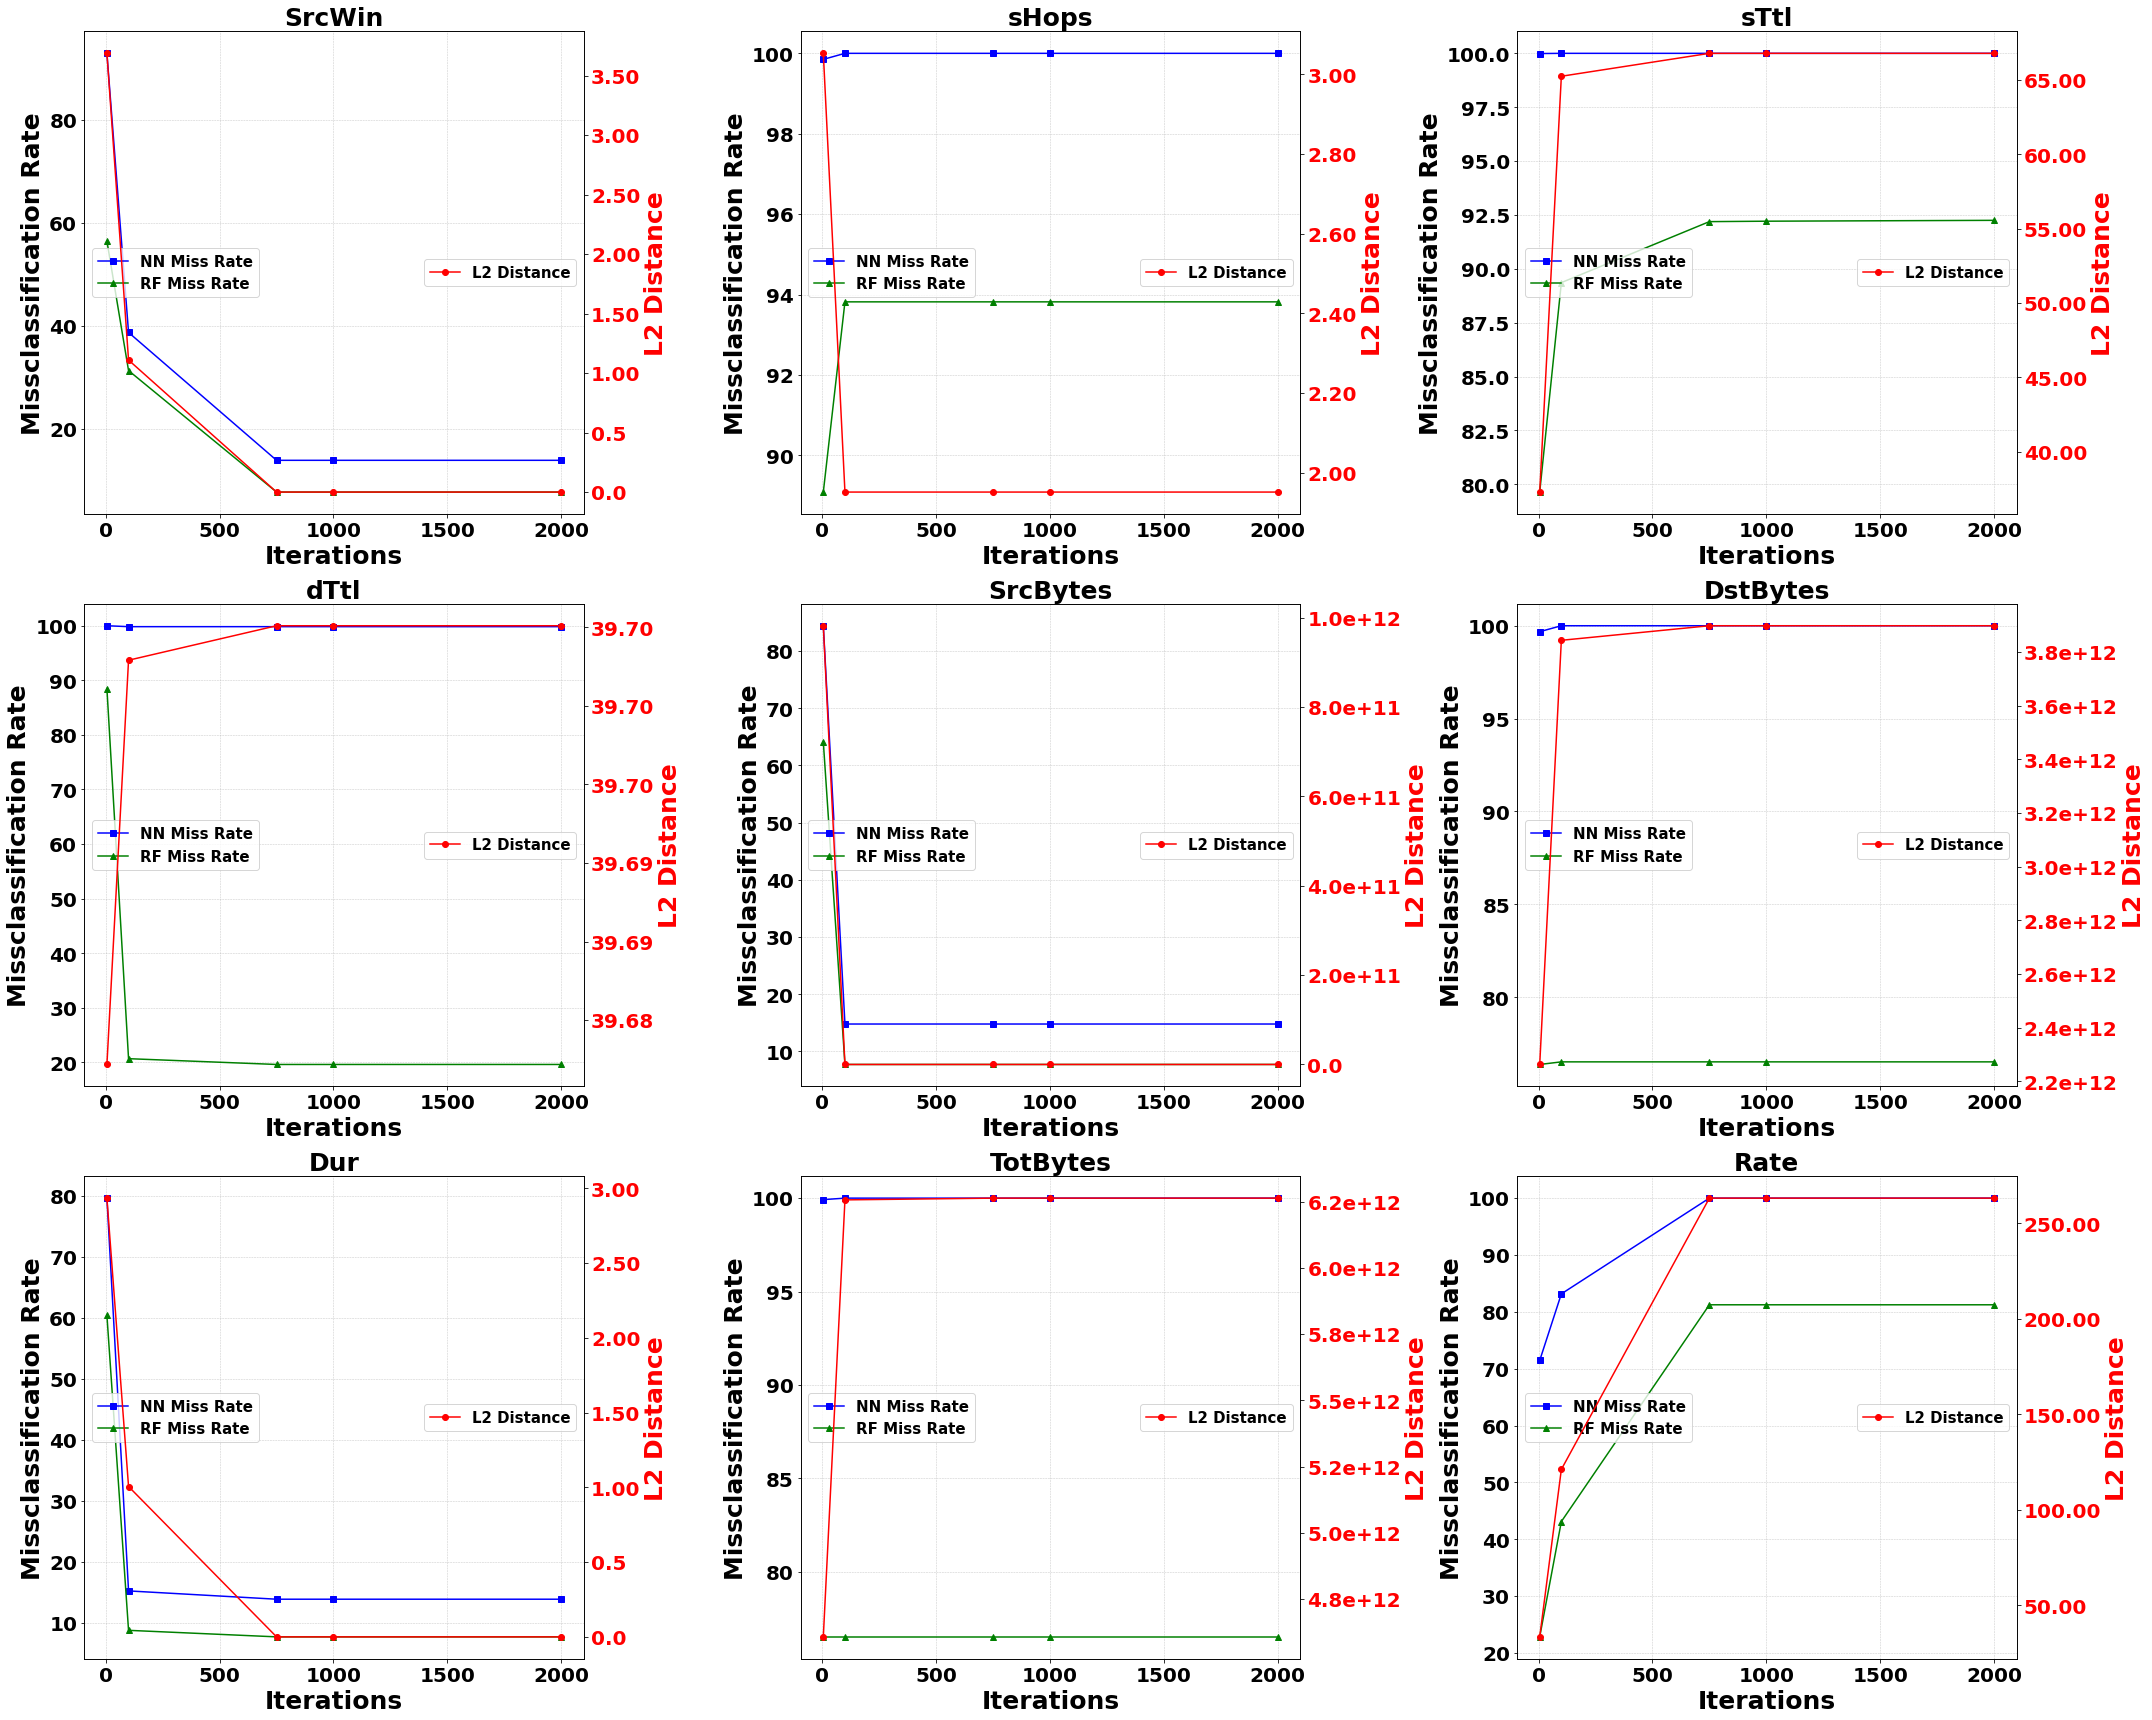

In [57]:
# USE THIS FOR GAN


# To make the 'NN Miss Rate' and 'RF Miss Rate' text in the legend largaer, we adjust the fontsize parameter in the legend method.

# Adjusting the plot to have three columns instead of two
num_columns = 3
num_features = len(features_to_attack)
num_rows = num_features // num_columns + (num_features % num_columns > 0)

# Define the fontsize for the legend text and titles
legend_fontsize = 15
title_fontsize = 25
label_fontsize = 25
tick_label_fontsize=20
font_properties = {'size': legend_fontsize, 'weight': 'bold'}
# Set up the figure with adjusted size for three columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(30, num_rows * 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting each feature in its own subplot with a secondary y-axis for L2 Distance
for index, feature in enumerate(features_to_attack):
    ax1 = axes[index]
    
    nn_miss_rate_list = extracted_data[feature]['nn_miss_rate_list']
    rf_miss_rate_list = extracted_data[feature]['rf_miss_rate_list']
    l2_dist_list = extracted_data[feature]['l2_distance_list']

    # NN and RF Miss Rate on the primary y-axis
    ax1.plot(checkpoints, nn_miss_rate_list, '-s', color='blue', label='NN Miss Rate')
    ax1.plot(checkpoints, rf_miss_rate_list, '-^', color='green', label='RF Miss Rate')
    ax1.set_xlabel('Iterations', fontsize=label_fontsize, fontweight='bold')
    ax1.set_ylabel('Missclassification Rate', color='black', fontsize=label_fontsize, fontweight='bold')
    ax1.tick_params(axis='both', labelsize=tick_label_fontsize)
    ax1.set_yticklabels(ax1.get_yticks(), weight='bold')
    ax1.set_xticklabels(ax1.get_xticks(), rotation=0, weight='bold')
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    # Apply this formatter to the x-axis of your plot
    ax1.xaxis.set_major_formatter(FuncFormatter(integer_formatter))
    ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    # L2 Distance on the secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(checkpoints, l2_dist_list, '-o', color='red', label='L2 Distance')
    ax2.set_ylabel('L2 Distance', color='red', fontsize=label_fontsize, fontweight='bold')
    ax2.tick_params(axis='y', labelsize=tick_label_fontsize)
    ax2.set_yticklabels(ax2.get_yticks(),color='red', weight='bold')
    # Set the legend with larger font size
    ax1.legend(loc='center left', prop=font_properties)
    ax2.legend(loc='center right', prop=font_properties)
    # ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    # Apply the formatter to the L2 distance axis
    ax2.yaxis.set_major_formatter(FuncFormatter(scientific_formatter))

    # Set the title with larger font size
    ax1.set_title(f'{feature}', fontsize=title_fontsize, fontweight='bold')

# Hide any unused subplots
for ax in axes[num_features:]:
    ax.set_visible(False)

# Adjust the layout
fig.tight_layout()
plt.savefig(save_path+name+'.png', dpi=100)
plt.show()
